<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Plot-the-cost-and-stop" data-toc-modified-id="Plot-the-cost-and-stop-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot the cost and stop</a></span></li></ul></div>

We have huge bumps for 25 nodes which prevents getting to the optimal point. How can we understand what is happening? 

# Load

In [8]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri, print_final_flows, plot_cost_all_path

import pandas as pd

from result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
n_nodes=25
subfolder='ni_comparison'

In [5]:
path='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+subfolder
path2='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [6]:
print(os.listdir(path))

['output_L_10000_ni_1000_no_50_ev_0.pkl', 'output_L_10000_ni_10000_no_50_ev_0.pkl', '.DS_Store', 'output_L_10000_ni_100_no_50_ev_0.pkl', 'Balance_2.png', 'Balance.png', 'output_L_10000_ni_10_no_50_ev_0.pkl']


In [7]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_1000_no_50_ev_0.pkl


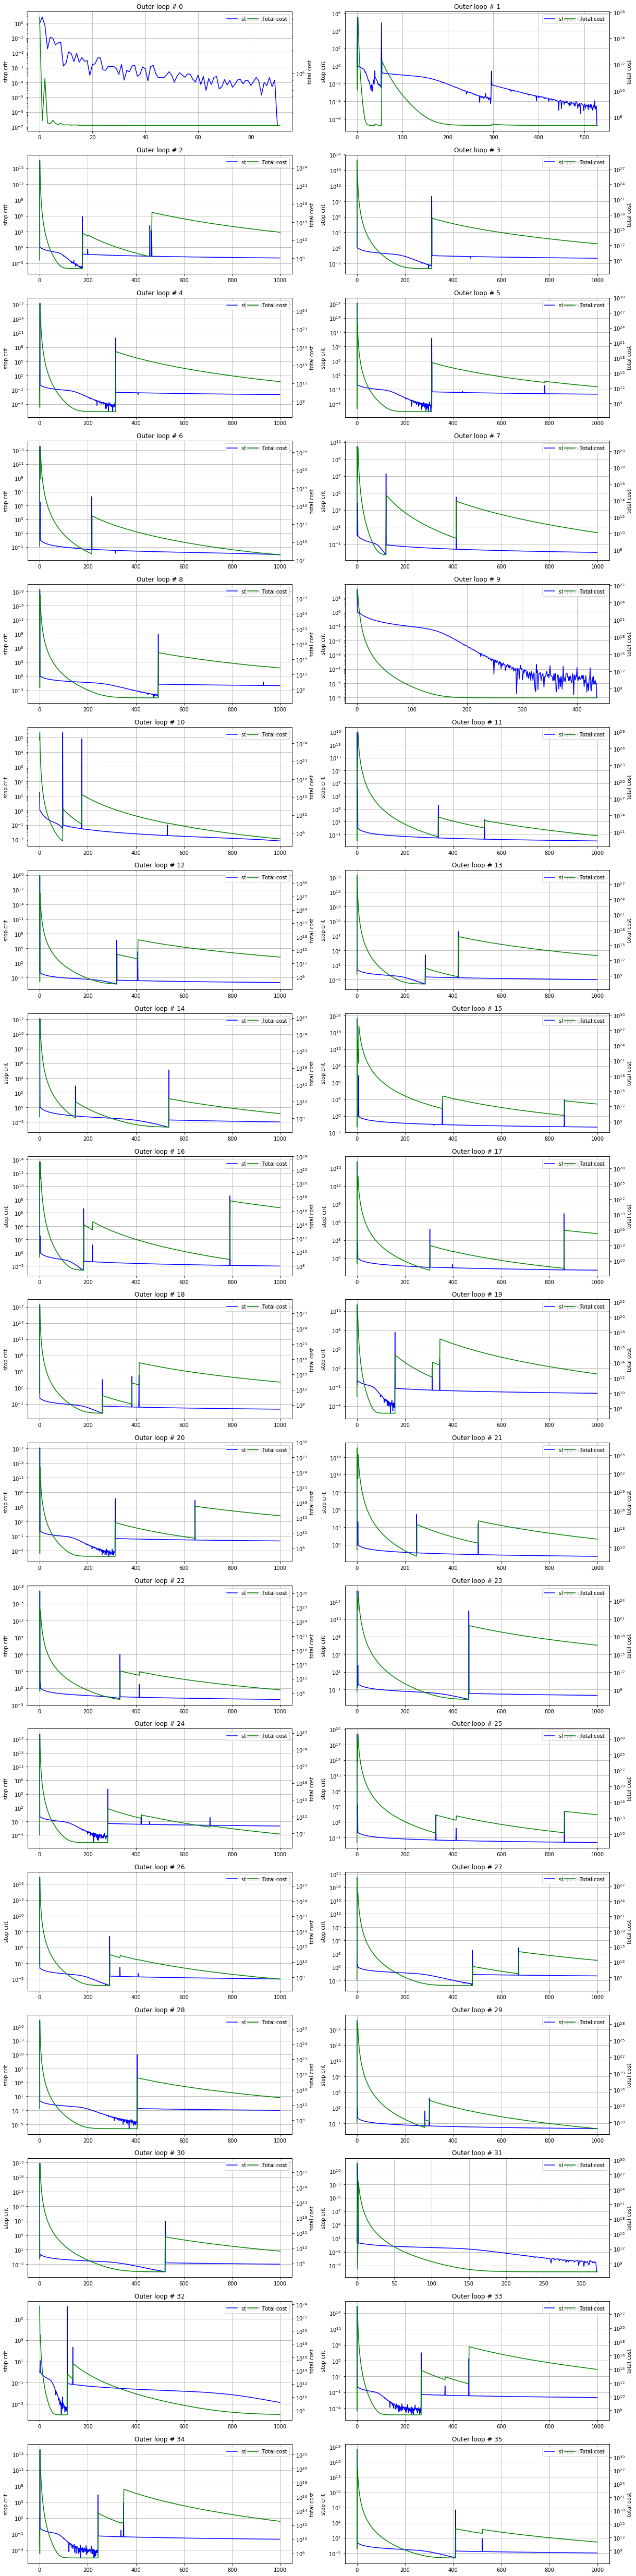

In [9]:
plot_stop_and_cost(opt_res)

We chose one outer iteration where the jumps are neat


In [12]:
ID=7

In [13]:
len(ri_FW)

37

In [16]:
G_ref=G_FW[ID]
opt_ref = opt_res[ID]
ri_ref=ri_FW[ID]

# Plot the cost and stop

In [27]:
lims=[110,140]

(110, 140)

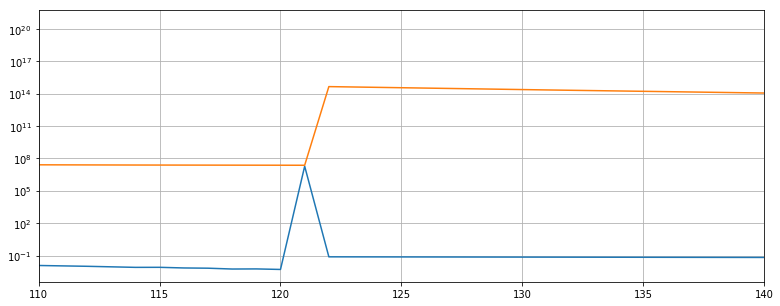

In [23]:
plt.figure(figsize=(13,5))
plt.plot(opt_ref['stop'])
plt.grid()
plt.yscale('log')
plt.plot(opt_ref['obj'])
plt.xlim(lims)

In [25]:
from result_analysis import plot_edge_attrs

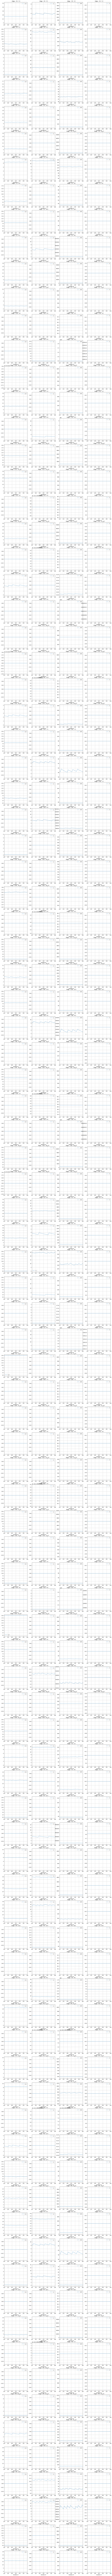

In [28]:
attrs=['f_m', 'f_r','cost','k']
# attrs=['f_m','f_r']
plot_edge_attrs(G_ref,None,attrs,dots=False,lims=lims)

I really do not see what is causing those bumps. The total cost is a direct function of the edge costs -- and of flows. I can't see any jump. I would have to decompose the total cost per edge and see where the jump is... 